### Figure 5 for Siddiqui et al 

In [1]:
import oceanspy as ospy
import xarray as xr
import matplotlib.pyplot as plt 
import cmocean
import cartopy.crs as ccrs
import numpy as np
import xarray as xr

In [89]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': '32',
         'axes.titlesize':'32',
         'xtick.labelsize':'32',
         'ytick.labelsize':'32'}
pylab.rcParams.update(params)
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [3]:
from matplotlib.patches import Polygon
%matplotlib inline

import warnings

import matplotlib.path                 as mpath
import cartopy.crs                     as ccrs
import cartopy.mpl.ticker              as ctk
import cartopy.feature as cfeature
import cartopy.mpl.patch as cpatch
import matplotlib as mpl

In [4]:
od = ospy.open_oceandataset.from_catalog('ECCO')

Opening ECCO.
ECCO v4r4 3D dataset, ocean simulations on LLC90 grid (monthly mean output)


In [5]:
od.dataset.nbytes * 1.0e-9

145.518932476

In [6]:
od.dataset

<xarray.Dataset>
Dimensions:     (time: 312, Zl: 50, face: 13, Y: 90, X: 90, Z: 50, Xp1: 90,
                 Yp1: 90, time_midp: 311, Zp1: 51, Zu: 50, nv: 2)
Coordinates: (12/42)
    CS          (face, Y, X) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    Depth       (face, Y, X) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    PHrefC      (Z) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    PHrefF      (Zp1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    SN          (face, Y, X) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    XC          (face, Y, X) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    ...          ...
    rAw         (face, Y, Xp1) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    rAz         (face, Yp1, Xp1) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
  * time        (time) datetime64[ns] 1992-01-16T12:00:00 ... 2017-12-16
    time_bnds   (time, nv) datetime64[ns] dask.array<chunksize=(1, 2), meta=np.ndarray>
  * time_midp   (time_midp) datetime64[ns] 1992-01-31T12:00:00 ... 2017-12-01
    timestep    (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
Dimensions without coordinates: nv
Data variables: (12/30)
    ADVr_SLT    (time, Zl, face, Y, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVr_TH     (time, Zl, face, Y, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_SLT    (time, Z, face, Y, Xp1) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_TH     (time, Z, face, Y, Xp1) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_SLT    (time, Z, face, Yp1, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_TH     (time, Z, face, Yp1, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ...          ...
    UVELMASS    (time, Z, face, Y, Xp1) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    VVELMASS    (time, Z, face, Yp1, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    WVELMASS    (time, Zl, face, Y, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    oceFWflx    (time, face, Y, X) float32 dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    oceQsw      (time, face, Y, X) float32 dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    oceSPtnd    (time, Z, face, Y, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
Attributes: (12/16)
    date_created:               Mon Dec 30 11:13:26 2019
    geospatial_lat_max:         90.0
    geospatial_lat_min:         -90.0
    geospatial_lon_max:         180.0
    geospatial_lon_min:         -179.9991912841797
    geospatial_vertical_max:    -5.0
    ...                         ...
    title:                      ECCOv4 MITgcm grid information
    OceanSpy_parameters:        {'rSphere': 6371.0, 'eq_state': 'jmd95', 'rho...
    OceanSpy_name:              ECCO_v4r4
    OceanSpy_description:       ECCO v4r4 3D dataset, ocean simulations on LL...
    OceanSpy_grid_coords:       {'Y': {'Y': None, 'Yp1': -0.5}, 'X': {'X': No...
    OceanSpy_face_connections:  {'face': {0: {'X': ((12, 'Y', False), (3, 'X'...

## drop unnecesary variables (k's)

In [7]:
_ds = od._ds.drop({'k', 'k_p1','k_u', 'k_l'})
_ds = od._ds.drop_dims({'nv'})
od._ds = _ds

In [8]:
od.grid

<xgcm.Grid>
time Axis (not periodic, boundary=None):
  * center   time_midp --> outer
  * outer    time --> center
Y Axis (not periodic, boundary=None):
  * center   Y --> left
  * left     Yp1 --> center
X Axis (not periodic, boundary=None):
  * center   X --> left
  * left     Xp1 --> center
Z Axis (not periodic, boundary=None):
  * center   Z --> left
  * left     Zl --> center
  * outer    Zp1 --> center
  * right    Zu --> center

In [9]:
od._ds

<xarray.Dataset>
Dimensions:     (time: 312, Zl: 50, face: 13, Y: 90, X: 90, Z: 50, Xp1: 90,
                 Yp1: 90, time_midp: 311, Zp1: 51, Zu: 50)
Coordinates: (12/41)
    CS          (face, Y, X) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    Depth       (face, Y, X) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    PHrefC      (Z) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    PHrefF      (Zp1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    SN          (face, Y, X) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    XC          (face, Y, X) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    ...          ...
    rAs         (face, Yp1, X) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    rAw         (face, Y, Xp1) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
    rAz         (face, Yp1, Xp1) float32 dask.array<chunksize=(13, 90, 90), meta=np.ndarray>
  * time        (time) datetime64[ns] 1992-01-16T12:00:00 ... 2017-12-16
  * time_midp   (time_midp) datetime64[ns] 1992-01-31T12:00:00 ... 2017-12-01
    timestep    (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
Data variables: (12/30)
    ADVr_SLT    (time, Zl, face, Y, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVr_TH     (time, Zl, face, Y, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_SLT    (time, Z, face, Y, Xp1) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVx_TH     (time, Z, face, Y, Xp1) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_SLT    (time, Z, face, Yp1, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ADVy_TH     (time, Z, face, Yp1, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    ...          ...
    UVELMASS    (time, Z, face, Y, Xp1) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    VVELMASS    (time, Z, face, Yp1, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    WVELMASS    (time, Zl, face, Y, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
    oceFWflx    (time, face, Y, X) float32 dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    oceQsw      (time, face, Y, X) float32 dask.array<chunksize=(1, 13, 90, 90), meta=np.ndarray>
    oceSPtnd    (time, Z, face, Y, X) float32 dask.array<chunksize=(1, 50, 13, 90, 90), meta=np.ndarray>
Attributes: (12/16)
    date_created:               Mon Dec 30 11:13:26 2019
    geospatial_lat_max:         90.0
    geospatial_lat_min:         -90.0
    geospatial_lon_max:         180.0
    geospatial_lon_min:         -179.9991912841797
    geospatial_vertical_max:    -5.0
    ...                         ...
    title:                      ECCOv4 MITgcm grid information
    OceanSpy_parameters:        {'rSphere': 6371.0, 'eq_state': 'jmd95', 'rho...
    OceanSpy_name:              ECCO_v4r4
    OceanSpy_description:       ECCO v4r4 3D dataset, ocean simulations on LL...
    OceanSpy_grid_coords:       {'Y': {'Y': None, 'Yp1': -0.5}, 'X': {'X': No...
    OceanSpy_face_connections:  {'face': {0: {'X': ((12, 'Y', False), (3, 'X'...

In [10]:
%%time
## Parameters




## Parameters
varList = ['SALT','ETAN']
YRange = [0,90] # degrees latitude
XRange = [-90.5, -2.5] # longitude
add_Hbdr = False
mask_outside = True
ZRange = None
add_Vbdr = False
timeRange = None
timeFreq= None
sampMethod = 'snapshot'
dropAxes = False
## Transformation parameters
centered= 'Atlantic'
transformation = 'arctic_crown'



## Carrying out the cutout
cut_od = ospy.subsample.cutout(od,varList,YRange,XRange,add_Hbdr,mask_outside,
                                   ZRange,add_Vbdr,timeRange,timeFreq,sampMethod,dropAxes,
                                   centered=centered)

Cutting out the oceandataset.
faces in the cutout [1, 2, 6, 10, 11]
CPU times: user 13.6 s, sys: 549 ms, total: 14.2 s
Wall time: 14.1 s


In [11]:
cut_od.dataset.nbytes * 1e-9

0.9374247840000001

In [12]:
cut_od._ds

<xarray.Dataset>
Dimensions:    (Z: 50, time: 312, Zp1: 51, Zl: 50, Zu: 50, time_midp: 311,
                X: 96, Xp1: 97, Y: 149, Yp1: 150)
Coordinates: (12/18)
  * Z          (Z) float32 -5.0 -15.0 -25.0 ... -5.039e+03 -5.461e+03 -5.906e+03
  * time       (time) datetime64[ns] 1992-01-16T12:00:00 ... 2017-12-16
  * Zp1        (Zp1) float32 0.0 -10.0 -20.0 ... -5.678e+03 -6.134e+03
  * Zl         (Zl) float32 0.0 -10.0 -20.0 ... -4.834e+03 -5.244e+03 -5.678e+03
  * Zu         (Zu) float32 -10.0 -20.0 -30.0 ... -5.678e+03 -6.134e+03
  * time_midp  (time_midp) datetime64[ns] 1992-01-31T12:00:00 ... 2017-12-01
    ...         ...
    YC         (Y, X) float32 dask.array<chunksize=(149, 96), meta=np.ndarray>
    YG         (Yp1, Xp1) float32 dask.array<chunksize=(150, 97), meta=np.ndarray>
    YU         (Y, Xp1) float32 dask.array<chunksize=(149, 97), meta=np.ndarray>
    XU         (Y, Xp1) float32 dask.array<chunksize=(149, 97), meta=np.ndarray>
    YV         (Yp1, X) float32 dask.array<chunksize=(150, 96), meta=np.ndarray>
    XV         (Yp1, X) float32 dask.array<chunksize=(150, 96), meta=np.ndarray>
Data variables: (12/28)
    SALT       (time, Z, Y, X) float32 dask.array<chunksize=(1, 50, 149, 96), meta=np.ndarray>
    ETAN       (time, Y, X) float32 dask.array<chunksize=(1, 149, 96), meta=np.ndarray>
    CS         (Y, X) float32 dask.array<chunksize=(149, 96), meta=np.ndarray>
    Depth      (Y, X) float32 dask.array<chunksize=(149, 96), meta=np.ndarray>
    PHrefC     (Z) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    PHrefF     (Zp1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    ...         ...
    maskW      (Z, Y, Xp1) float64 dask.array<chunksize=(50, 149, 97), meta=np.ndarray>
    rA         (Y, X) float32 dask.array<chunksize=(149, 96), meta=np.ndarray>
    rAs        (Yp1, X) float32 dask.array<chunksize=(150, 96), meta=np.ndarray>
    rAw        (Y, Xp1) float32 dask.array<chunksize=(149, 97), meta=np.ndarray>
    rAz        (Yp1, Xp1) float32 dask.array<chunksize=(150, 97), meta=np.ndarray>
    timestep   (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes:
    OceanSpy_face_connections:  None
    OceanSpy_grid_coords:       {'Y': {'Y': None, 'Yp1': 0.5}, 'X': {'X': Non...
    OceanSpy_description:       Cutout of
    OceanSpy_grid_periodic:     []

In [13]:
pylab.rcParams.update({
  "text.usetex": True})
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [14]:
cut_od._ds

<xarray.Dataset>
Dimensions:    (Z: 50, time: 312, Zp1: 51, Zl: 50, Zu: 50, time_midp: 311,
                X: 96, Xp1: 97, Y: 149, Yp1: 150)
Coordinates: (12/18)
  * Z          (Z) float32 -5.0 -15.0 -25.0 ... -5.039e+03 -5.461e+03 -5.906e+03
  * time       (time) datetime64[ns] 1992-01-16T12:00:00 ... 2017-12-16
  * Zp1        (Zp1) float32 0.0 -10.0 -20.0 ... -5.678e+03 -6.134e+03
  * Zl         (Zl) float32 0.0 -10.0 -20.0 ... -4.834e+03 -5.244e+03 -5.678e+03
  * Zu         (Zu) float32 -10.0 -20.0 -30.0 ... -5.678e+03 -6.134e+03
  * time_midp  (time_midp) datetime64[ns] 1992-01-31T12:00:00 ... 2017-12-01
    ...         ...
    YC         (Y, X) float32 dask.array<chunksize=(149, 96), meta=np.ndarray>
    YG         (Yp1, Xp1) float32 dask.array<chunksize=(150, 97), meta=np.ndarray>
    YU         (Y, Xp1) float32 dask.array<chunksize=(149, 97), meta=np.ndarray>
    XU         (Y, Xp1) float32 dask.array<chunksize=(149, 97), meta=np.ndarray>
    YV         (Yp1, X) float32 dask.array<chunksize=(150, 96), meta=np.ndarray>
    XV         (Yp1, X) float32 dask.array<chunksize=(150, 96), meta=np.ndarray>
Data variables: (12/28)
    SALT       (time, Z, Y, X) float32 dask.array<chunksize=(1, 50, 149, 96), meta=np.ndarray>
    ETAN       (time, Y, X) float32 dask.array<chunksize=(1, 149, 96), meta=np.ndarray>
    CS         (Y, X) float32 dask.array<chunksize=(149, 96), meta=np.ndarray>
    Depth      (Y, X) float32 dask.array<chunksize=(149, 96), meta=np.ndarray>
    PHrefC     (Z) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    PHrefF     (Zp1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    ...         ...
    maskW      (Z, Y, Xp1) float64 dask.array<chunksize=(50, 149, 97), meta=np.ndarray>
    rA         (Y, X) float32 dask.array<chunksize=(149, 96), meta=np.ndarray>
    rAs        (Yp1, X) float32 dask.array<chunksize=(150, 96), meta=np.ndarray>
    rAw        (Y, Xp1) float32 dask.array<chunksize=(149, 97), meta=np.ndarray>
    rAz        (Yp1, Xp1) float32 dask.array<chunksize=(150, 97), meta=np.ndarray>
    timestep   (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes:
    OceanSpy_face_connections:  None
    OceanSpy_grid_coords:       {'Y': {'Y': None, 'Yp1': 0.5}, 'X': {'X': Non...
    OceanSpy_description:       Cutout of
    OceanSpy_grid_periodic:     []

In [15]:
# Masking the depth
#cut_od._ds = cut_od._ds.where(cut_od._ds.Depth>0)
cut_od._ds['Depth_masked'] = cut_od._ds['Depth']
depth_masked = cut_od._ds['Depth_masked']
depth_masked = depth_masked.where(depth_masked>0)
cut_od._ds['Depth_masked'] = depth_masked

## Reading section data

In [16]:
prop_surv_ST = ospy.open_oceandataset.from_netcdf('/home/idies/workspace/Storage/asiddi24/persistent/SciServer/Chapter_1/Siddiqui_etal_JGR_2023/data/prop_1992_2017_it4.nc')
prop_surv_SP = ospy.open_oceandataset.from_netcdf('/home/idies/workspace/Storage/asiddi24/persistent/SciServer/Chapter_1/Siddiqui_etal_JGR_2023/data/prop_1992_2017_it3.nc')
prop_surv_ST._ds = prop_surv_ST._ds.drop('month')
prop_surv_SP._ds = prop_surv_SP._ds.drop('month')


Opening dataset from [/home/idies/workspace/Storage/asiddi24/persistent/SciServer/Chapter_1/Siddiqui_etal_JGR_2023/data/prop_1992_2017_it4.nc].
Opening dataset from [/home/idies/workspace/Storage/asiddi24/persistent/SciServer/Chapter_1/Siddiqui_etal_JGR_2023/data/prop_1992_2017_it3.nc].


### Viz the sections

In [17]:
cut_od = cut_od.set_projection('PlateCarree', central_longitude=-40)

## Reading AVISO data

In [18]:
ds_aviso = xr.open_mfdataset('/home/idies/workspace/Storage/asiddi24/persistent/SciServer/Chapter_1/Siddiqui_etal_JGR_2023/data/aviso/dt*.nc')

## Spatial filtering

In [19]:
import gcm_filters

/home/idies/mambaforge/envs/Oceanography/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/idies/mambaforge/envs/Oceanography/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


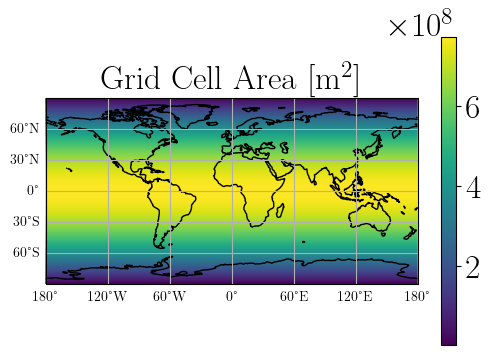

In [20]:
#Taken from https://gcm-filters.readthedocs.io/en/latest/examples/example_satellite_observations.html

# -- compute cell area -- 
# -- for each lat/lon grid box gcm-filters needs area in same format as du,dv
dy0 = 1852*60*np.abs(ds_aviso['latitude'][2].data - ds_aviso['latitude'][1].data)
# ** note: dy0 is a constant over the globe ** 
dx0 = 1852*60*np.cos(np.deg2rad(ds_aviso['latitude'].data))*(ds_aviso['longitude'][2].data - ds_aviso['longitude'][1].data) 
area = dy0*np.tile(dx0, (len(ds_aviso['longitude'].data),1))
area = np.transpose(area)
dA = xr.DataArray(
    data=area,
    dims=["latitude", "longitude"],
    coords=dict(
    longitude=(["longitude"], ds_aviso['longitude'].data), latitude=(["latitude"], ds_aviso['latitude'].data),),
)
area_cmap = 'viridis'       # colormap 
f,ax = plt.subplots(1,1,figsize=(6,4),subplot_kw={'projection':ccrs.PlateCarree()})
dA.plot(ax=ax, cmap=area_cmap)
ax.set_title('Grid Cell Area [m$^2$]')
ax.coastlines()
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
plt.show()

In [21]:
# -- wet mask -- 
# -- land = 0, water = 1 -- 
wetMask = xr.where(np.isnan(ds_aviso['adt']), 0, 1)
wetMask

<xarray.DataArray 'adt' (time: 120, latitude: 720, longitude: 1440)>
dask.array<where, shape=(120, 720, 1440), dtype=int64, chunksize=(1, 720, 1440), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 1993-01-15 1993-02-15 ... 2016-12-15
  * latitude   (latitude) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * longitude  (longitude) float32 0.125 0.375 0.625 0.875 ... 359.4 359.6 359.9

In [22]:
# -- call gcm-filters and select desired grid type -- 
gcm_filters.required_grid_vars(gcm_filters.GridType.REGULAR_WITH_LAND_AREA_WEIGHTED)

['area', 'wet_mask']

In [23]:
# -- choose a filtering scale -- 
filter_scale = 6
dx_min = 1
# -- initialze filter object for two filter types -- 
specs = {
    'filter_scale': filter_scale,
    'dx_min': dx_min,
    'grid_type': gcm_filters.GridType.REGULAR_WITH_LAND_AREA_WEIGHTED,
    'grid_vars': {'area': dA, 'wet_mask': wetMask}
}
# GAUSSIAN 
filter_simple_fixed_factor_G = gcm_filters.Filter(filter_shape=gcm_filters.FilterShape.GAUSSIAN, **specs)
# TAPER 
filter_simple_fixed_factor_T = gcm_filters.Filter(filter_shape=gcm_filters.FilterShape.TAPER, **specs)


In [24]:
# -- filter SSH (for both Gaussian and Taper kernels) -- 
adt_filtered_simple_fixed_factor = filter_simple_fixed_factor_G.apply(ds_aviso['adt'], dims=['latitude', 'longitude'])
adt_filtered_simple_fixed_factor_T = filter_simple_fixed_factor_T.apply(ds_aviso['adt'], dims=['latitude', 'longitude'])

### Loading MDT

In [25]:
ds_mdt = xr.open_dataset('/home/idies/workspace/Storage/asiddi24/persistent/SciServer/Chapter_1/Siddiqui_etal_JGR_2023/data/aviso/dataset-mdt-cnes-cls18-global_1657604020672.nc').load()
ds_mdt

<xarray.Dataset>
Dimensions:    (time: 1, latitude: 1440, longitude: 2880)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-01
  * latitude   (latitude) float32 -89.94 -89.81 -89.69 ... 89.69 89.81 89.94
  * longitude  (longitude) float32 0.0625 0.1875 0.3125 ... 359.7 359.8 359.9
Data variables:
    err_mdt    (time, latitude, longitude) float64 nan nan nan ... nan nan nan
    u          (time, latitude, longitude) float64 nan nan nan ... nan nan nan
    v          (time, latitude, longitude) float64 nan nan nan ... nan nan nan
    err_v      (time, latitude, longitude) float64 nan nan nan ... nan nan nan
    mdt        (time, latitude, longitude) float64 nan nan nan ... nan nan nan
    err_u      (time, latitude, longitude) float64 nan nan nan ... nan nan nan
Attributes: (12/26)
    cdm_data_type:              Grid
    Conventions:                CF-1.6
    Metadata_Conventions:       Unidata Dataset Discovery v1.0
    contact:                    aviso@altimetry.fr, smulet@groupcls.com
    creator_email:              smulet@groupcls.com
    creator_url:                https://www.aviso.altimetry.fr
    ...                         ...
    processing_level:           L4
    product_version:            1.0
    summary:                    Mean Dynamic Topography calculated from the c...
    title:                      MDT_CNES_CLS18
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    History:                    Translated to CF-1.0 Conventions by Netcdf-Ja...

In [26]:
S = cut_od._ds.SALT
S_anom = S.groupby('time.month') - S.sel(time=slice('2005-01-30','2014-12-15')).groupby('time.month').mean('time')

/home/idies/mambaforge/envs/Oceanography/lib/python3.10/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing with an out-of-order index is generating 26 times more chunks
  return self.array[key]


In [27]:
# Detrending code by Ryan Abernathy

def detrend_dim(da, dim, deg=1):
    # detrend along a single dimension
    p = da.polyfit(dim=dim, deg=deg)
    fit = xr.polyval(da[dim], p.polyfit_coefficients)
    return da - fit

def detrend(da, dims, deg=1):
    # detrend along multiple dimensions
    # only valid for linear detrending (deg=1)
    da_detrended = da
    for dim in dims:
        da_detrended = detrend_dim(da_detrended, dim, deg=deg)
    return da_detrended

In [28]:
S_anom_dtd = detrend(S_anom, dims=['time'])
cut_od._ds['S_anom'] = S_anom_dtd

In [29]:
cut_od._ds['sss_anom'] = S_anom_dtd.isel(Z=0)
cut_od._ds

<xarray.Dataset>
Dimensions:       (Z: 50, time: 312, Zp1: 51, Zl: 50, Zu: 50, time_midp: 311,
                   X: 96, Xp1: 97, Y: 149, Yp1: 150)
Coordinates: (12/19)
  * Z             (Z) float32 -5.0 -15.0 -25.0 ... -5.461e+03 -5.906e+03
  * time          (time) datetime64[ns] 1992-01-16T12:00:00 ... 2017-12-16
  * Zp1           (Zp1) float32 0.0 -10.0 -20.0 ... -5.678e+03 -6.134e+03
  * Zl            (Zl) float32 0.0 -10.0 -20.0 ... -5.244e+03 -5.678e+03
  * Zu            (Zu) float32 -10.0 -20.0 -30.0 ... -5.678e+03 -6.134e+03
  * time_midp     (time_midp) datetime64[ns] 1992-01-31T12:00:00 ... 2017-12-01
    ...            ...
    YG            (Yp1, Xp1) float32 dask.array<chunksize=(150, 97), meta=np.ndarray>
    YU            (Y, Xp1) float32 dask.array<chunksize=(149, 97), meta=np.ndarray>
    XU            (Y, Xp1) float32 dask.array<chunksize=(149, 97), meta=np.ndarray>
    YV            (Yp1, X) float32 dask.array<chunksize=(150, 96), meta=np.ndarray>
    XV            (Yp1, X) float32 dask.array<chunksize=(150, 96), meta=np.ndarray>
    month         (time) int64 1 2 3 4 5 6 7 8 9 10 ... 3 4 5 6 7 8 9 10 11 12
Data variables: (12/31)
    SALT          (time, Z, Y, X) float32 dask.array<chunksize=(1, 50, 149, 96), meta=np.ndarray>
    ETAN          (time, Y, X) float32 dask.array<chunksize=(1, 149, 96), meta=np.ndarray>
    CS            (Y, X) float32 dask.array<chunksize=(149, 96), meta=np.ndarray>
    Depth         (Y, X) float32 dask.array<chunksize=(149, 96), meta=np.ndarray>
    PHrefC        (Z) float32 dask.array<chunksize=(50,), meta=np.ndarray>
    PHrefF        (Zp1) float32 dask.array<chunksize=(51,), meta=np.ndarray>
    ...            ...
    rAw           (Y, Xp1) float32 dask.array<chunksize=(149, 97), meta=np.ndarray>
    rAz           (Yp1, Xp1) float32 dask.array<chunksize=(150, 97), meta=np.ndarray>
    timestep      (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
    Depth_masked  (Y, X) float32 dask.array<chunksize=(149, 96), meta=np.ndarray>
    S_anom        (time, Z, Y, X) float64 dask.array<chunksize=(1, 50, 149, 96), meta=np.ndarray>
    sss_anom      (time, Y, X) float64 dask.array<chunksize=(1, 149, 96), meta=np.ndarray>
Attributes:
    OceanSpy_face_connections:  None
    OceanSpy_grid_coords:       {'Y': {'Y': None, 'Yp1': 0.5}, 'X': {'X': Non...
    OceanSpy_description:       Cutout of
    OceanSpy_grid_periodic:     []
    OceanSpy_projection:        PlateCarree(**{'central_longitude': -40})

In [30]:
cut_od._ds['SALT_masked'] = cut_od._ds['SALT']
salt_masked = cut_od._ds['SALT_masked']
salt_masked = salt_masked.where(salt_masked>0)
cut_od._ds['SALT_masked'] = salt_masked

In [31]:
grid = xr.open_dataset('/home/idies/workspace/Storage/asiddi24/persistent/SciServer/Chapter_1/Siddiqui_etal_JGR_2023/data/ETOPO/ETOPO1_Ice_g_gmt4.grd', decode_cf=True, engine='netcdf4')

In [32]:
grid.x[::4]

<xarray.DataArray 'x' (x: 5401)>
array([-180.      , -179.933333, -179.866667, ...,  179.866667,  179.933333,
        180.      ])
Coordinates:
  * x        (x) float64 -180.0 -179.9 -179.9 -179.8 ... 179.8 179.9 179.9 180.0
Attributes:
    long_name:     Longitude
    actual_range:  [-180.  180.]
    units:         degrees_east

In [33]:
grid.nbytes * 1.0e-9

1.8667584240000001

In [34]:
grid=grid.sel(y=slice(0,90), x=slice(-120,50)).where(grid.z>0)

In [35]:
grid.nbytes * 1.0e-9

0.44088962400000004

In [36]:
grid=grid.load()

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

def plot_examples(colormaps):
    """
    Helper function to plot data with associated colormap.
    """
    np.random.seed(19680801)
    data = np.random.randn(30, 30)
    n = len(colormaps)
    fig, axs = plt.subplots(1, n, figsize=(n * 2 + 2, 3),
                            constrained_layout=True, squeeze=False)
    for [ax, cmap] in zip(axs.flat, colormaps):
        psm = ax.pcolormesh(data, cmap=cmap, rasterized=True, vmin=-4, vmax=4)
        fig.colorbar(psm, ax=ax)
    plt.show()


/tmp/ipykernel_3646/1075132830.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('gray', 256)
/tmp/ipykernel_3646/1075132830.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis_big = cm.get_cmap('gray')


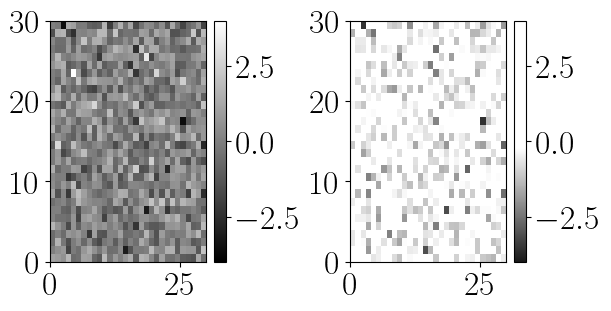

In [38]:
viridis = cm.get_cmap('gray', 256)
viridis_big = cm.get_cmap('gray')
newcmp = ListedColormap(viridis_big(np.linspace(0.1,2, 256)))
plot_examples([viridis, newcmp])

CPU times: user 1min 4s, sys: 7.92 s, total: 1min 12s
Wall time: 37.4 s


Text(0.5, 0.8, '(\\textbf{a})')

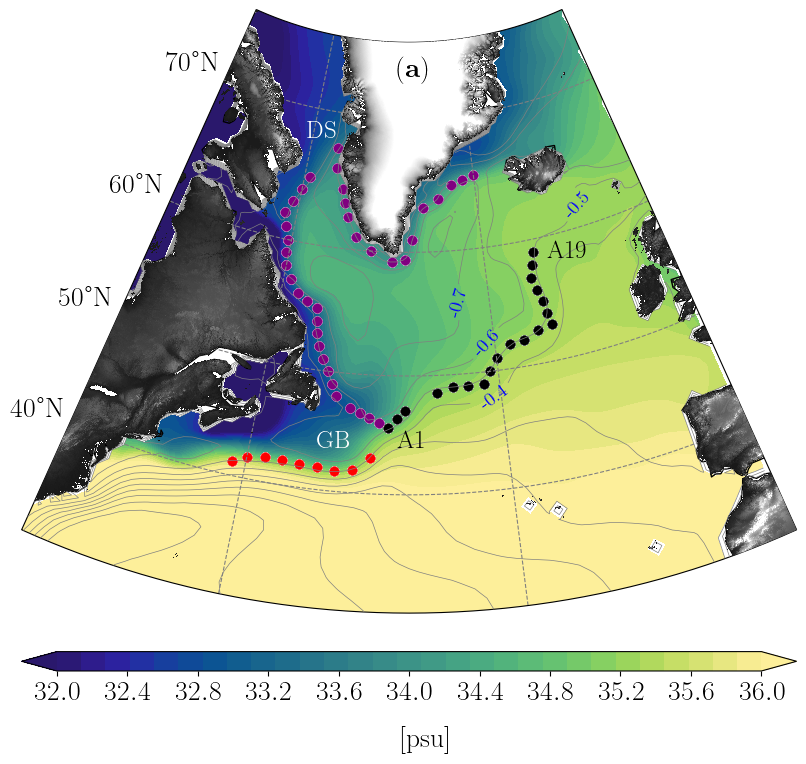

In [39]:
%%time
# plotting the iceland basin
import matplotlib
#matplotlib.use('Agg')

import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

pylab.rcParams['contour.negative_linestyle'] = 'solid'

fig= plt.figure(figsize=(10,10), frameon=True)

# defining the projection 
lon1, lon2, lat1, lat2 = [-80, -3, 30, 75]

rect = mpath.Path([[lon1, lat1], [lon2, lat1],
    [lon2, lat2], [lon1, lat2], [lon1, lat1]], closed=True).interpolated(150)

name='LambertConformal'
proj=ccrs.LambertConformal(central_longitude=(lon1+lon2)*0.5,
    central_latitude=(lat1+lat2)*0.5)

ax = plt.axes(projection=proj)
    
                        
                        
# defining levels for the pcolormesh
cmap = cmocean.cm.balance
levels = MaxNLocator(nbins=100).tick_values(32,36)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

# # pcolormesh plot
im = plt.contourf(cut_od._ds.XC, cut_od._ds.YC, cut_od._ds.SALT_masked.isel(Z=0).mean('time'), levels=np.linspace(32,36,30),extend='both', cmap=cmocean.cm.haline,
             transform=ccrs.PlateCarree())

co = ax.contour(cut_od._ds.XC, cut_od._ds.YC, cut_od._ds.ETAN.mean('time'),
                [-0.8,-0.7,-0.6, -0.5, -0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8], 
                linewidths=[0.5], colors='gray',
                #norm=norm,
                #extend='both',          
                transform=ccrs.PlateCarree(), zorder=5)


# labelling contours
lons=np.array([-30,-15,-30,-40])
lats=np.array([47,62,52,56])

lambert_coords = proj.transform_points(ccrs.PlateCarree(), lons, lats)
lambert_coords_new = []
for entry in range(0,len(lambert_coords)):
    lambert_coords_new.append(lambert_coords[entry][0:-1])
ax.clabel(co, levels=[-0.4,-0.5,-0.6,-0.7], inline=True,  inline_spacing=-10, manual=lambert_coords_new , fmt='%1.1f', colors='b', fontsize=14)

# Adding etopop
ax.pcolormesh(grid.x[::4], grid.y[::4], grid.z[::4,::4], transform=ccrs.PlateCarree(), cmap=newcmp, zorder=6)

proj_to_data = ccrs.PlateCarree()._as_mpl_transform(ax) - ax.transData
rect_in_target = proj_to_data.transform_path(rect)

ax.set_boundary(rect_in_target)
ax.set_xlim(rect_in_target.vertices[:,0].min(), rect_in_target.vertices[:,0].max())
ax.set_ylim(rect_in_target.vertices[:,1].min(), rect_in_target.vertices[:,1].max())
ax.coastlines()
#ax.add_feature(land_50m) 

gl=ax.gridlines(draw_labels=True, x_inline=False, y_inline=False, color='gray', linestyle='dashed')
gl.top_labels=False
gl.right_labels=False
gl.left_labels=True
gl.bottom_labels=False
gl.rotate_labels=False
gl.xlocator=ctk.LongitudeLocator(1)
gl.ylocator=ctk.LatitudeLocator(6)
gl.xformatter=ctk.LongitudeFormatter()
gl.yformatter=ctk.LatitudeFormatter()
gl.xlabel_style = {'size': 20, 'color': 'black'}
gl.ylabel_style = {'size': 20, 'color': 'black', 'va': 'bottom', 'ha':'right'}

# Add a colorbar axis at the bottom of the graph
#cbar_ax = fig.add_axes([0.1, 0.15, 0.8, 0.02])

#Draw the colorbar
cbar=fig.colorbar(im, orientation='horizontal', aspect=40, ticks=np.linspace(32,36,11), pad=0.05)
cbar.ax.tick_params(labelsize=20)
plt.figtext(0.504,0.13, '[psu]', fontsize=20)


 
XC_prop_subtropics = prop_surv_ST.dataset["XC"].isel(time=0).squeeze()
YC_prop_subtropics = prop_surv_ST.dataset["YC"].isel(time=0).squeeze()
XC_prop_subpolar = prop_surv_SP.dataset["XC"].isel(time=0).squeeze()
YC_prop_subpolar = prop_surv_SP.dataset["YC"].isel(time=0).squeeze()



prop_line_SP = ax.plot(XC_prop_subpolar[0:38], YC_prop_subpolar[0:38], 'o', markersize=7, markerfacecolor='purple',
                     markeredgewidth=0.1, markeredgecolor='w', transform=ccrs.PlateCarree())
prop_line_ST = ax.plot(XC_prop_subtropics[0:10], YC_prop_subtropics[0:10], 'o', markersize=7, markerfacecolor='red',
                     markeredgewidth=0.1, markeredgecolor='w', transform=ccrs.PlateCarree())
prop_line_common = ax.plot(XC_prop_subpolar[38:], YC_prop_subpolar[38:], 'o', markersize=7, markerfacecolor='black',
                     markeredgewidth=0.1, markeredgecolor='w', transform=ccrs.PlateCarree())

plt.figtext(0.50,0.43, 'A1',fontsize=18)
plt.figtext(0.65,0.62, 'A19', fontsize=18)
plt.figtext(0.41,0.74, 'DS', color='white', fontsize=18)
plt.figtext(0.42,0.43, 'GB', color='white',fontsize=18)
plt.figtext(0.5,0.8, r'(\textbf{a})', color='k',fontsize=20)

# ax.set_rasterization_zorder(10)

# plt.savefig('figs/Fig_6_a.png', format='png', bbox_inches='tight', facecolor='white', dpi=400)

## Creating the Hovmuller

In [40]:
prop_SP = prop_surv_SP._ds.S
prop_ST = prop_surv_ST._ds.S

In [41]:
prop_SP_anom = prop_SP.groupby('time.month') - prop_SP.sel(time=slice('1992-01-30','2017-12-15')).groupby('time.month').mean('time')
prop_ST_anom = prop_ST.groupby('time.month') - prop_ST.sel(time=slice('1992-01-30','2017-12-15')).groupby('time.month').mean('time')

In [42]:
prop_SP_anom_dtd = detrend(prop_SP_anom, dims=['time'])
prop_ST_anom_dtd = detrend(prop_ST_anom, dims=['time'])

In [43]:
prop_surv_SP._ds['S_anom'] = prop_SP_anom_dtd
prop_surv_ST._ds['S_anom'] = prop_ST_anom_dtd

In [44]:
prop_surv_SP._ds['S_anom_1000'] = prop_surv_SP._ds.S_anom.sel(Z=slice(0,-1000))
prop_surv_ST._ds['S_anom_1000'] = prop_surv_ST._ds.S_anom.sel(Z=slice(0,-1000))


In [45]:
S_anom_1000_SP = prop_surv_SP._ds.S_anom_1000
S_anom_1000_SP = S_anom_1000_SP.mean(dim=['Z'])

S_anom_1000_ST = prop_surv_ST._ds.S_anom_1000
S_anom_1000_ST = S_anom_1000_ST.mean(dim=['Z'])

# This has changed now. Compare and check if it gives the same result

In [46]:
S_anom_1000_SP_test = S_anom_1000_SP

In [47]:
S_anom_1000_SP_test.values[:,38:] = S_anom_1000_ST.values[:,8:]

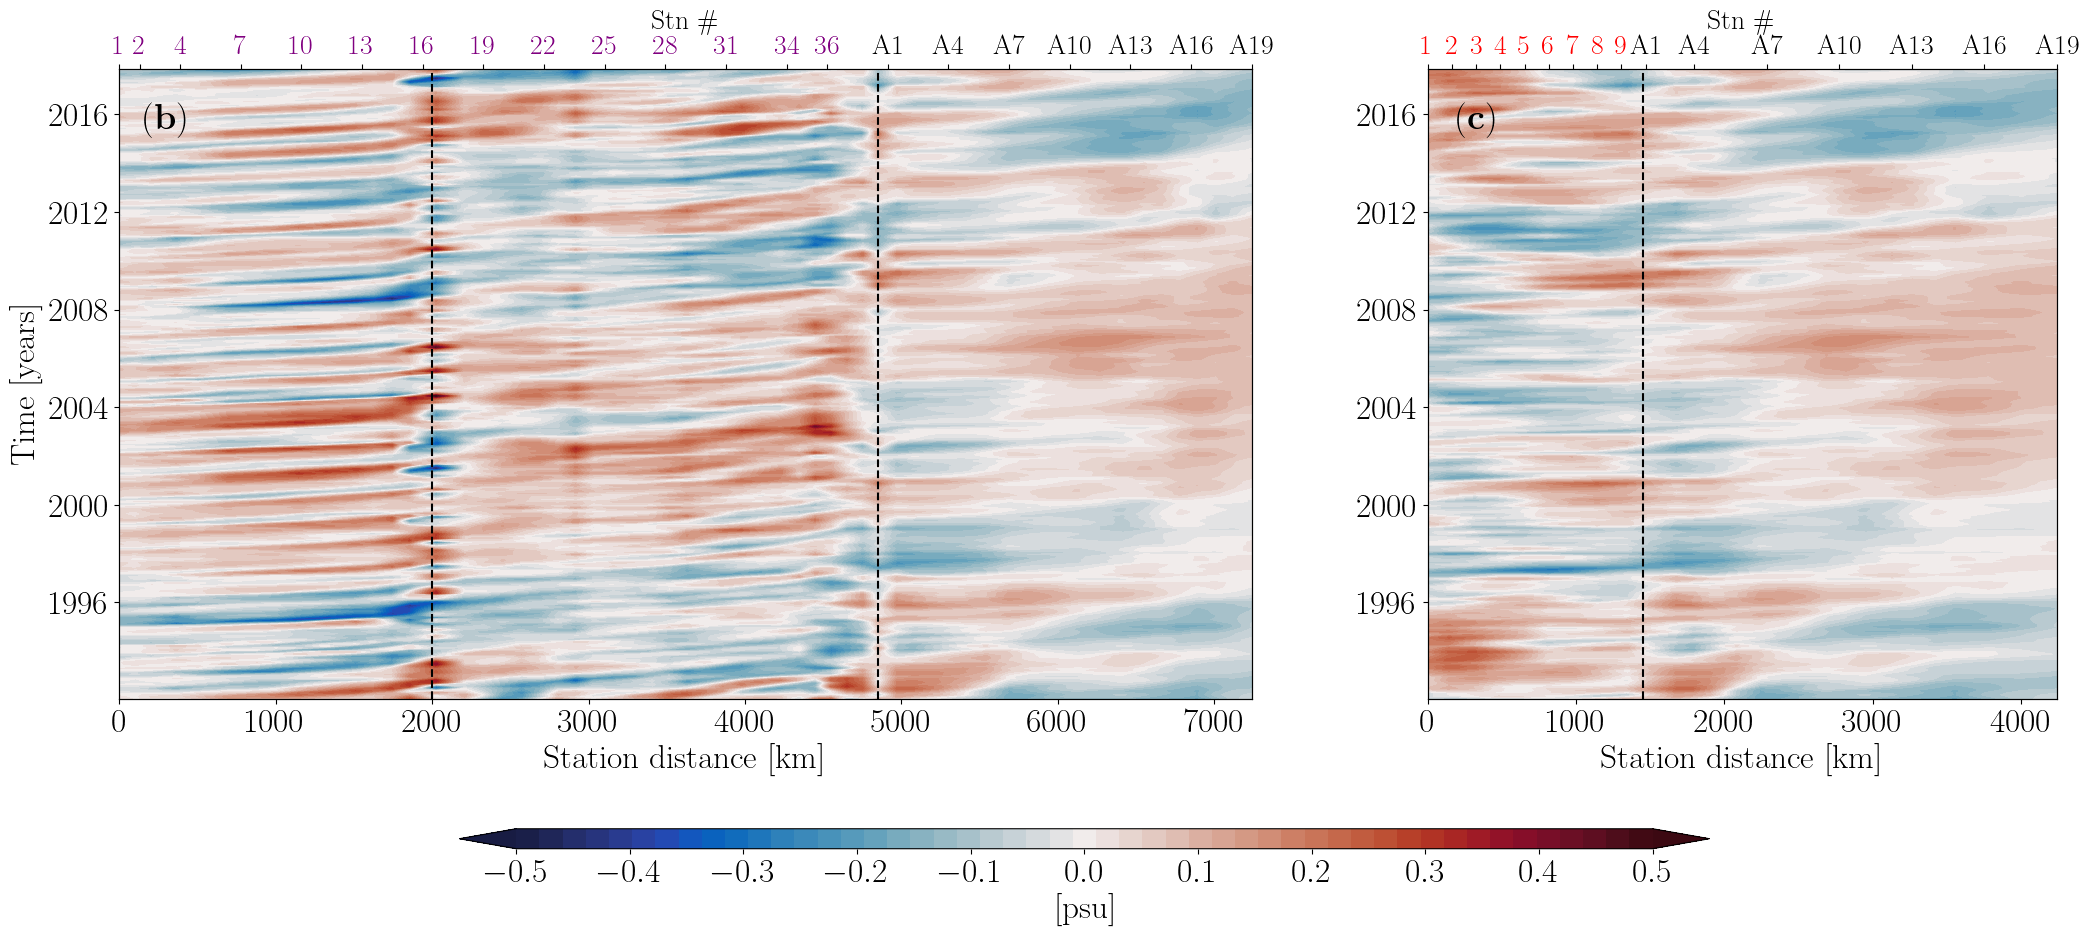

In [48]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [1.8, 1]}, figsize=(25,10))

ax = ax.flatten()


co = ax[0].contourf(S_anom_1000_SP.station_dist, S_anom_1000_SP.time, S_anom_1000_SP_test.squeeze(), levels = np.linspace(-0.5,0.5,50), extend='both', cmap=cmocean.cm.balance)
# Put a custom label on the y axis
ax[0].set_xlabel(r"Station distance [km]", fontsize=24)
ax[0].set_ylabel(r"Time [years]", fontsize=24)

ax[1].contourf(S_anom_1000_ST.station_dist, S_anom_1000_ST.time, S_anom_1000_ST.squeeze(), levels = np.linspace(-0.5,0.5,50), extend='both', cmap=cmocean.cm.balance)
# Put a custom label on the y axis
ax[1].set_xlabel(r"Station distance [km]", fontsize=24)
#ax[1].set_ylabel(r"Time [years]", fontsize=20)


ax2= ax[0].twiny()

norm_ticks = S_anom_1000_SP.station_dist/S_anom_1000_SP.station_dist[-1]
new_tick_locations = norm_ticks

labels =  np.array(np.linspace(1,57,57), dtype=int)


# Move twinned axis ticks and label from top to bottom
ax2.xaxis.set_ticks_position("top")
ax2.xaxis.set_label_position("top")

# Turn on the frame for the twin axis, but then hide all 
# but the bottom spine
ax[0].set_frame_on(True)
ax[0].patch.set_visible(False)
#for sp in ax2.spines.itervalues():
#    sp.set_visible(False)
ax[0].spines["top"].set_visible(True)

x = list(range(1, 58))
# Set custom x-axis ticks with spacing
custom_ticks = [0,1, 3,6, 9, 12, 15 , 18, 21, 24,27,30, 33, 35, 38, 41, 44, 47, 50, 53, 56]

# Corresponding labels for the custom ticks
custom_labels = ['1','2','4', '7', '10', '13', '16', '19', '22', '25', '28', '31', '34', '36', 'A1', 'A4', 'A7', 'A10', 'A13', 'A16', 'A19']

ax2.set_xticks(custom_ticks, custom_labels)  # Rotate labels for readability



# ax2.set_xticks(new_tick_locations[np.r_[1:19:2,20:36:3, 37:57:3]])
# ax2.set_xticklabels(custom_labels[1:19:2,20:36:3, 37:57:3])
# #ax2.set_xticklabels(labels_alpha[37:37:2])



ax2.set_xlabel(r"Stn \#", fontsize=20)

ax2.xaxis.label.set_color('black')
ax2.spines['top'].set_color('black')
ax2.tick_params(axis='x', colors='black')
ax2.xaxis.set_tick_params(labelsize=16)


# Colors for the ticks
tick_positions, tick_labels = ax2.get_xticks(), ax2.get_xticklabels()

# Update the x-axis tick labels color
for i, label in enumerate(tick_labels):
    if i < 14:
        label.set_color('purple')  # Change 'red' to the color of your choice
    else:
        label.set_color('black')

# # Set the new x-axis tick labels
# ax2.set_xticks(tick_positions)
# ax2.set_xticklabels(tick_labels)


ax2.yaxis.set_tick_params(labelsize=20)
ax2.xaxis.set_tick_params(labelsize=20)

y_min, y_max = ax[0].get_ylim()
y_min1, y_max1 = ax[1].get_ylim()

# Plot vertical lines at x=10 from y=min to y=max
ax[0].vlines(2000, y_min, y_max, colors='black', linestyles='dashed')
ax[0].vlines(4850, y_min, y_max, colors='black', linestyles='dashed')
ax[1].vlines(1450, y_min1, y_max1, colors='black', linestyles='dashed')


#############################3


ax3= ax[1].twiny()

norm_ticks_2 = S_anom_1000_ST.station_dist/S_anom_1000_ST.station_dist[-1]
new_tick_locations_2 = norm_ticks_2

labels_2 =  np.array(np.linspace(1,27,27), dtype=int)

# Move twinned axis ticks and label from top to bottom
ax3.xaxis.set_ticks_position("top")
ax3.xaxis.set_label_position("top")

# Turn on the frame for the twin axis, but then hide all 
# but the bottom spine
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
#for sp in ax2.spines.itervalues():
#    sp.set_visible(False)
ax3.spines["top"].set_visible(True)

x = list(range(1, 27))
# Set custom x-axis ticks with spacing
custom_ticks = [0,1,2,3,4,5,6,7,8, 9,11,14,17,20,23, 26]

# Corresponding labels for the custom ticks
custom_labels = ['1', '2','3','4','5','6','7','8','9', 'A1', 'A4', 'A7', 'A10', 'A13', 'A16', 'A19']

ax3.set_xticks(custom_ticks, custom_labels)  # Rotate labels for readability



ax3.set_xlabel(r"Stn \#", fontsize=20)

ax3.xaxis.label.set_color('black')
ax3.spines['top'].set_color('black')
ax3.tick_params(axis='x', colors='black')
ax3.xaxis.set_tick_params(labelsize=16)


# Colors for the ticks
tick_positions2, tick_labels2 = ax3.get_xticks(), ax3.get_xticklabels()

# Update the x-axis tick labels color
for i, label in enumerate(tick_labels2):
    if i < 9:
        label.set_color('red')  # Change 'red' to the color of your choice
    else:
        label.set_color('black')

# # Set the new x-axis tick labels
# ax3.set_xticks(tick_positions2)
# ax3.set_xticklabels(tick_labels2)


ax3.yaxis.set_tick_params(labelsize=20)
ax3.xaxis.set_tick_params(labelsize=20)


cb_ax = fig.add_axes([0.261, 0.1, 0.5, 0.02])
cbar = fig.colorbar(co, cax=cb_ax, orientation='horizontal', extend='both')

# set the colorbar ticks and tick labels
cbar.set_ticks(np.linspace(-0.5,0.5,11))


plt.figtext(0.5,0.03, '[psu]', fontsize=24)
plt.figtext(0.135,0.82, r'(\textbf{b})', fontsize=26)
plt.figtext(0.66,0.82, r'(\textbf{c})', fontsize=26)
plt.subplots_adjust(bottom=0.25)  # Adjust these values as desired

#cbar=fig.colorbar(co, ax=ax[0], orientation='vertical', shrink = 0.4, ticks=np.linspace(-0.6,0.6,13), extend='both', pad=0.05)

CPU times: user 1min 38s, sys: 16 s, total: 1min 54s
Wall time: 1min 17s


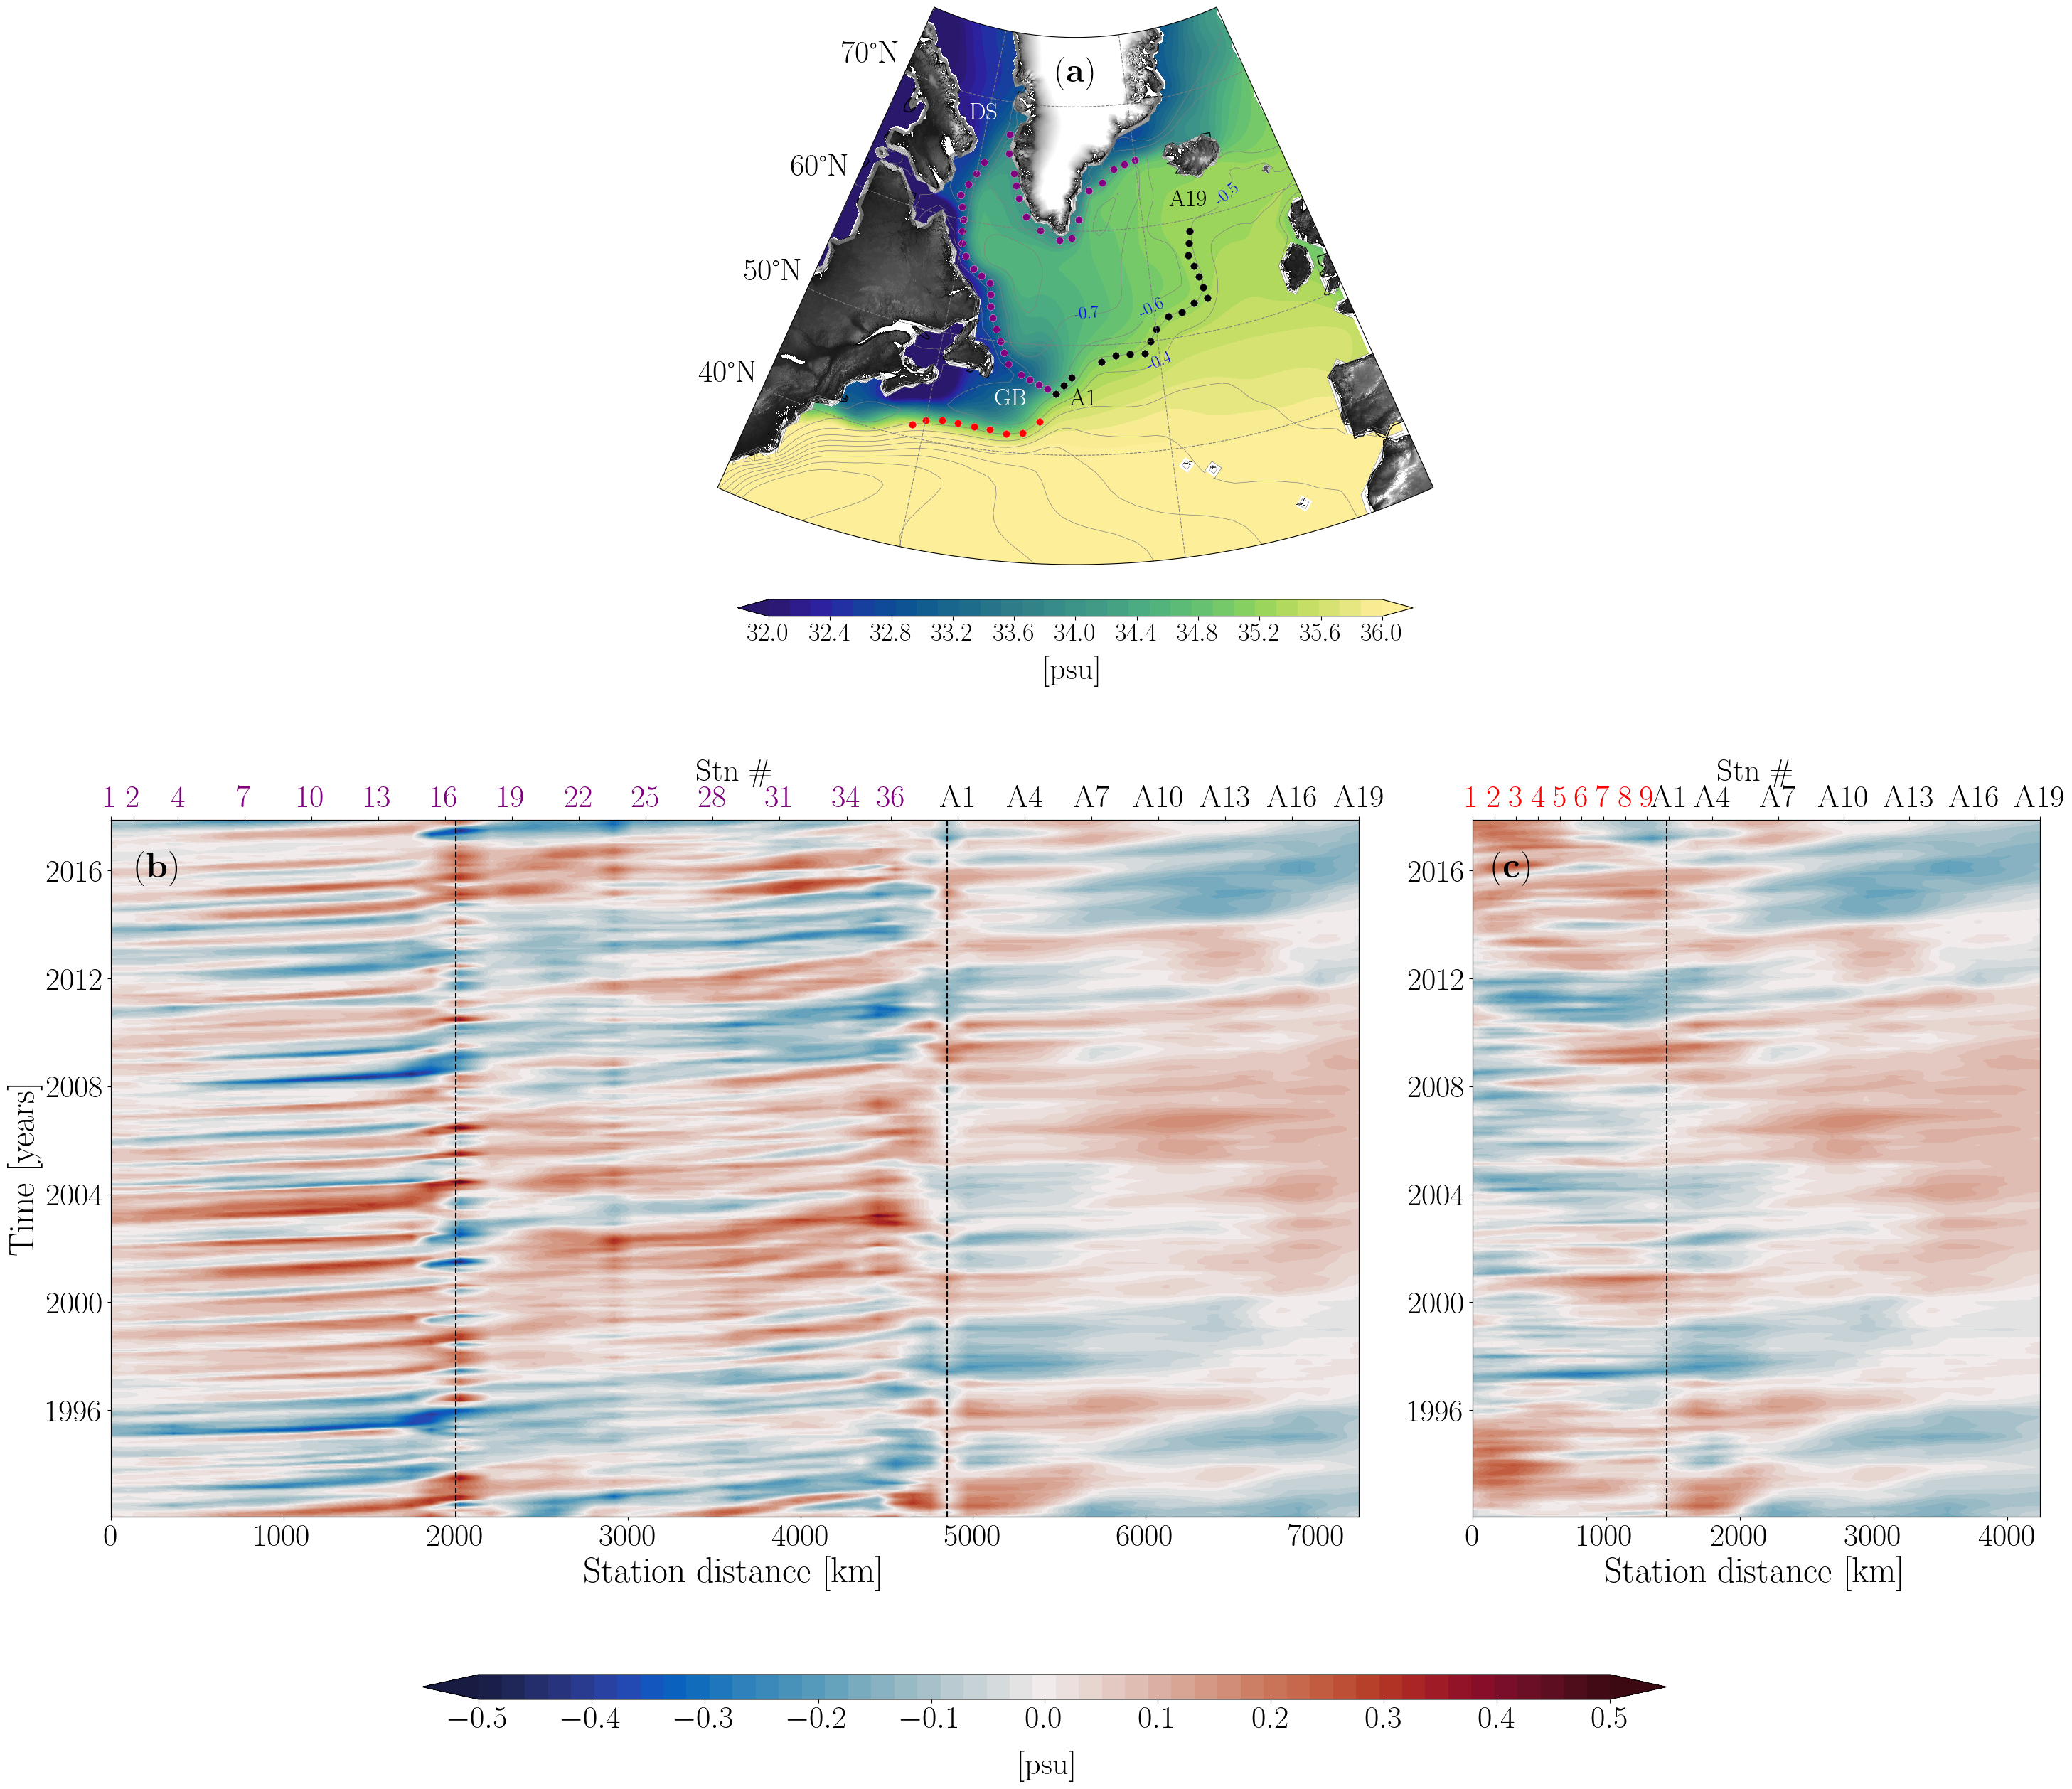

In [92]:
%%time

from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=[35,35])

# plotting the iceland basin
import matplotlib
#matplotlib.use('Agg')

import cartopy
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

pylab.rcParams['contour.negative_linestyle'] = 'solid'


# defining the projection 
lon1, lon2, lat1, lat2 = [-80, -3, 30, 75]

rect = mpath.Path([[lon1, lat1], [lon2, lat1],
    [lon2, lat2], [lon1, lat2], [lon1, lat1]], closed=True).interpolated(150)

name='LambertConformal'
proj=ccrs.LambertConformal(central_longitude=(lon1+lon2)*0.5,
    central_latitude=(lat1+lat2)*0.5)

gs1 = GridSpec(5, 3, hspace=0.4, wspace=0.2)
ax1 = fig.add_subplot(gs1[0:2, :], projection=proj)
ax2 = fig.add_subplot(gs1[2:4, :-1])
ax3 = fig.add_subplot(gs1[2:4, -1])
    
                        
                        
# defining levels for the pcolormesh
cmap = cmocean.cm.balance
levels = MaxNLocator(nbins=100).tick_values(32,36)
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

# # pcolormesh plot
im = ax1.contourf(cut_od._ds.XC, cut_od._ds.YC, cut_od._ds.SALT_masked.isel(Z=0).mean('time'), levels=np.linspace(32,36,30),extend='both', cmap=cmocean.cm.haline,
             transform=ccrs.PlateCarree())

co = ax1.contour(cut_od._ds.XC, cut_od._ds.YC, cut_od._ds.ETAN.mean('time'),
                [-0.8,-0.7,-0.6, -0.5, -0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8], 
                linewidths=[0.5], colors='gray',
                #norm=norm,
                #extend='both',          
                transform=ccrs.PlateCarree())


# labelling contours
lons=np.array([-30,-15,-30,-40])
lats=np.array([47,62,52,56])

lambert_coords = proj.transform_points(ccrs.PlateCarree(), lons, lats)
lambert_coords_new = []
for entry in range(0,len(lambert_coords)):
    lambert_coords_new.append(lambert_coords[entry][0:-1])
ax1.clabel(co, levels=[-0.4,-0.5,-0.6,-0.7], inline=True,  inline_spacing=-10, manual=lambert_coords_new , fmt='%1.1f', colors='b', fontsize=18)

# Adding etopop
ax1.pcolormesh(grid.x[::4], grid.y[::4], grid.z[::4,::4], transform=ccrs.PlateCarree(), cmap=newcmp, zorder=-10)

ax1.set_rasterization_zorder(0)

proj_to_data = ccrs.PlateCarree()._as_mpl_transform(ax1) - ax1.transData
rect_in_target = proj_to_data.transform_path(rect)

ax1.set_boundary(rect_in_target)
ax1.set_xlim(rect_in_target.vertices[:,0].min(), rect_in_target.vertices[:,0].max())
ax1.set_ylim(rect_in_target.vertices[:,1].min(), rect_in_target.vertices[:,1].max())
ax1.coastlines()
#ax.add_feature(land_50m) 

gl=ax1.gridlines(draw_labels=True, x_inline=False, y_inline=False, color='gray', linestyle='dashed')
gl.top_labels=False
gl.right_labels=False
gl.left_labels=True
gl.bottom_labels=False
gl.rotate_labels=False
gl.xlocator=ctk.LongitudeLocator(1)
gl.ylocator=ctk.LatitudeLocator(6)
gl.xformatter=ctk.LongitudeFormatter()
gl.yformatter=ctk.LatitudeFormatter()
gl.xlabel_style = {'size': 20, 'color': 'white'}
gl.ylabel_style = {'size': 32, 'color': 'black', 'va': 'bottom', 'ha':'right'}

# Add a colorbar axis at the bottom of the graph
#cbar_ax = fig.add_axes([0.1, 0.15, 0.8, 0.02])

#Draw the colorbar
cbar=fig.colorbar(im, ax = ax1, orientation='horizontal', aspect=40, ticks=np.linspace(32,36,11), pad=0.05, shrink =0.35)
cbar.ax.tick_params(labelsize=26)
plt.figtext(0.5,0.61, '[psu]', fontsize=32)


 
XC_prop_subtropics = prop_surv_ST.dataset["XC"].isel(time=0).squeeze()
YC_prop_subtropics = prop_surv_ST.dataset["YC"].isel(time=0).squeeze()
XC_prop_subpolar = prop_surv_SP.dataset["XC"].isel(time=0).squeeze()
YC_prop_subpolar = prop_surv_SP.dataset["YC"].isel(time=0).squeeze()



prop_line_SP = ax1.plot(XC_prop_subpolar[0:38], YC_prop_subpolar[0:38], 'o', markersize=7, markerfacecolor='purple',
                     markeredgewidth=0.1, markeredgecolor='w', transform=ccrs.PlateCarree())
prop_line_ST = ax1.plot(XC_prop_subtropics[0:10], YC_prop_subtropics[0:10], 'o', markersize=7, markerfacecolor='red',
                     markeredgewidth=0.1, markeredgecolor='w', transform=ccrs.PlateCarree())
prop_line_common = ax1.plot(XC_prop_subpolar[38:], YC_prop_subpolar[38:], 'o', markersize=7, markerfacecolor='black',
                     markeredgewidth=0.1, markeredgecolor='w', transform=ccrs.PlateCarree())
from matplotlib.gridspec import GridSpec


def annotate_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)


plt.figtext(0.51,0.72, 'A1',fontsize=24)
plt.figtext(0.55,0.8, 'A19', fontsize=24)
plt.figtext(0.47,0.835, 'DS', color='white', fontsize=24)
plt.figtext(0.48,0.72, 'GB', color='white',fontsize=24)
plt.figtext(0.505,0.85, r'(\textbf{a})', color='k',fontsize=34)

# ax.set_rasterization_zorder(10)

import matplotlib.dates as mdates


co = ax2.contourf(S_anom_1000_SP.station_dist, S_anom_1000_SP.time, S_anom_1000_SP_test.squeeze(), levels = np.linspace(-0.5,0.5,50), extend='both', cmap=cmocean.cm.balance)
# Put a custom label on the y axis
ax2.set_xlabel(r"Station distance [km]", fontsize=36)
ax2.set_ylabel(r"Time [years]", fontsize=36)

ax3.contourf(S_anom_1000_ST.station_dist, S_anom_1000_ST.time, S_anom_1000_ST.squeeze(), levels = np.linspace(-0.5,0.5,50), extend='both', cmap=cmocean.cm.balance)
# Put a custom label on the y axis
ax3.set_xlabel(r"Station distance [km]", fontsize=36)
#ax[1].set_ylabel(r"Time [years]", fontsize=20)


ax22= ax2.twiny()

norm_ticks = S_anom_1000_SP.station_dist/S_anom_1000_SP.station_dist[-1]
new_tick_locations = norm_ticks

labels =  np.array(np.linspace(1,57,57), dtype=int)


# Move twinned axis ticks and label from top to bottom
ax22.xaxis.set_ticks_position("top")
ax22.xaxis.set_label_position("top")

# Turn on the frame for the twin axis, but then hide all 
# but the bottom spine
ax2.set_frame_on(True)
ax2.patch.set_visible(False)
#for sp in ax2.spines.itervalues():
#    sp.set_visible(False)
ax2.spines["top"].set_visible(True)

x = list(range(1, 58))
# Set custom x-axis ticks with spacing
custom_ticks = [0,1, 3,6, 9, 12, 15 , 18, 21, 24,27,30, 33, 35, 38, 41, 44, 47, 50, 53, 56]

# Corresponding labels for the custom ticks
custom_labels = ['1','2','4', '7', '10', '13', '16', '19', '22', '25', '28', '31', '34', '36', 'A1', 'A4', 'A7', 'A10', 'A13', 'A16', 'A19']

ax22.set_xticks(custom_ticks, custom_labels)  # Rotate labels for readability


ax22.set_xlabel(r"Stn \#", fontsize=32)

ax22.xaxis.label.set_color('black')
ax22.spines['top'].set_color('black')
ax22.tick_params(axis='x', colors='black')


# Colors for the ticks
tick_positions, tick_labels = ax22.get_xticks(), ax22.get_xticklabels()

# Update the x-axis tick labels color
for i, label in enumerate(tick_labels):
    if i < 14:
        label.set_color('purple')  # Change 'red' to the color of your choice
    else:
        label.set_color('black')

ax22.yaxis.set_tick_params(labelsize=32)
ax22.xaxis.set_tick_params(labelsize=32)

y_min, y_max = ax2.get_ylim()
y_min1, y_max1 = ax3.get_ylim()

# Plot vertical lines at x=10 from y=min to y=max
ax2.vlines(2000, y_min, y_max, colors='black', linestyles='dashed')
ax2.vlines(4850, y_min, y_max, colors='black', linestyles='dashed')
ax3.vlines(1450, y_min1, y_max1, colors='black', linestyles='dashed')


#############################3


ax33= ax3.twiny()

norm_ticks_2 = S_anom_1000_ST.station_dist/S_anom_1000_ST.station_dist[-1]
new_tick_locations_2 = norm_ticks_2

labels_2 =  np.array(np.linspace(1,27,27), dtype=int)

# Move twinned axis ticks and label from top to bottom
ax33.xaxis.set_ticks_position("top")
ax33.xaxis.set_label_position("top")

# Turn on the frame for the twin axis, but then hide all 
# but the bottom spine
ax33.set_frame_on(True)
ax33.patch.set_visible(False)
#for sp in ax2.spines.itervalues():
#    sp.set_visible(False)
ax33.spines["top"].set_visible(True)

x = list(range(1, 27))
# Set custom x-axis ticks with spacing
custom_ticks = [0,1,2,3,4,5,6,7,8, 9,11,14,17,20,23, 26]

# Corresponding labels for the custom ticks
custom_labels = ['1', '2','3','4','5','6','7','8','9', 'A1', 'A4', 'A7', 'A10', 'A13', 'A16', 'A19']

ax33.set_xticks(custom_ticks, custom_labels)  # Rotate labels for readability



ax33.set_xlabel(r"Stn \#", fontsize=32)

ax33.xaxis.label.set_color('black')
ax33.spines['top'].set_color('black')
ax33.tick_params(axis='x', colors='black')


# Colors for the ticks
tick_positions2, tick_labels2 = ax33.get_xticks(), ax33.get_xticklabels()

# Update the x-axis tick labels color
for i, label in enumerate(tick_labels2):
    if i < 9:
        label.set_color('red')  # Change 'red' to the color of your choice
    else:
        label.set_color('black')

ax33.yaxis.set_tick_params(labelsize=32)
ax33.xaxis.set_tick_params(labelsize=32)


cb_ax2 = fig.add_axes([0.25, 0.2, 0.5, 0.01])
cbar2 = fig.colorbar(co, cax=cb_ax2, orientation='horizontal', extend='both', aspect=30)

# set the colorbar ticks and tick labels
cbar2.set_ticks(np.linspace(-0.5,0.5,11))


plt.figtext(0.49,0.17, '[psu]', fontsize=32)
plt.figtext(0.135,0.53, r'(\textbf{b})', fontsize=36)
plt.figtext(0.68,0.53, r'(\textbf{c})', fontsize=36)
# plt.subplots_adjust(bottom=0.25)  # Adjust these values as desired

plt.savefig('figs/Fig_5.pdf',bbox_inches='tight', dpi=300)